<a href="https://colab.research.google.com/github/thechristoalex/machine-flow/blob/main/Christo's%20TF%20Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Keras

In [ ]:
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

<ipython-input-8-0b452f475108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

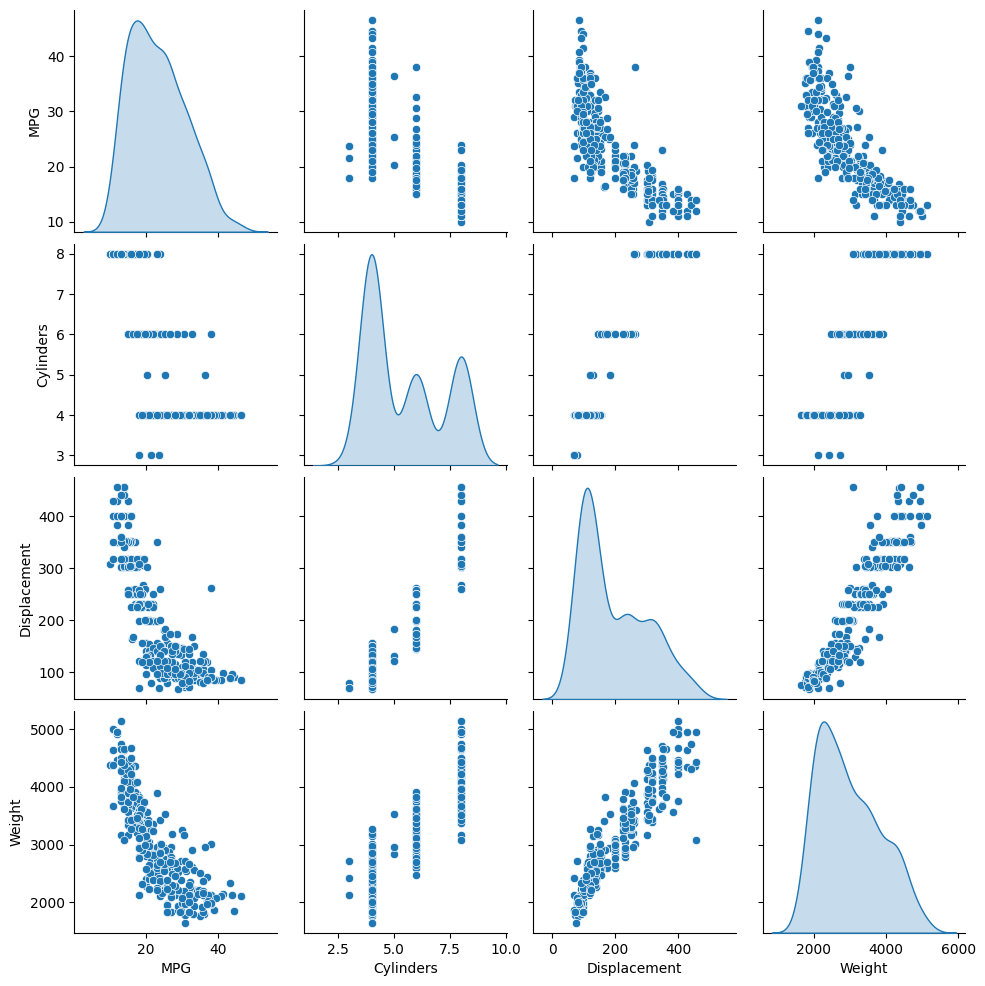

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

## Neural Networks

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.15.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Checking the size and shape

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
len(train_images)

60000

### Preprocessing data

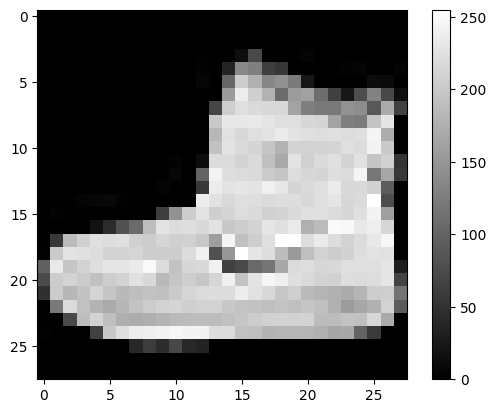

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
train_images[1].max()

255

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

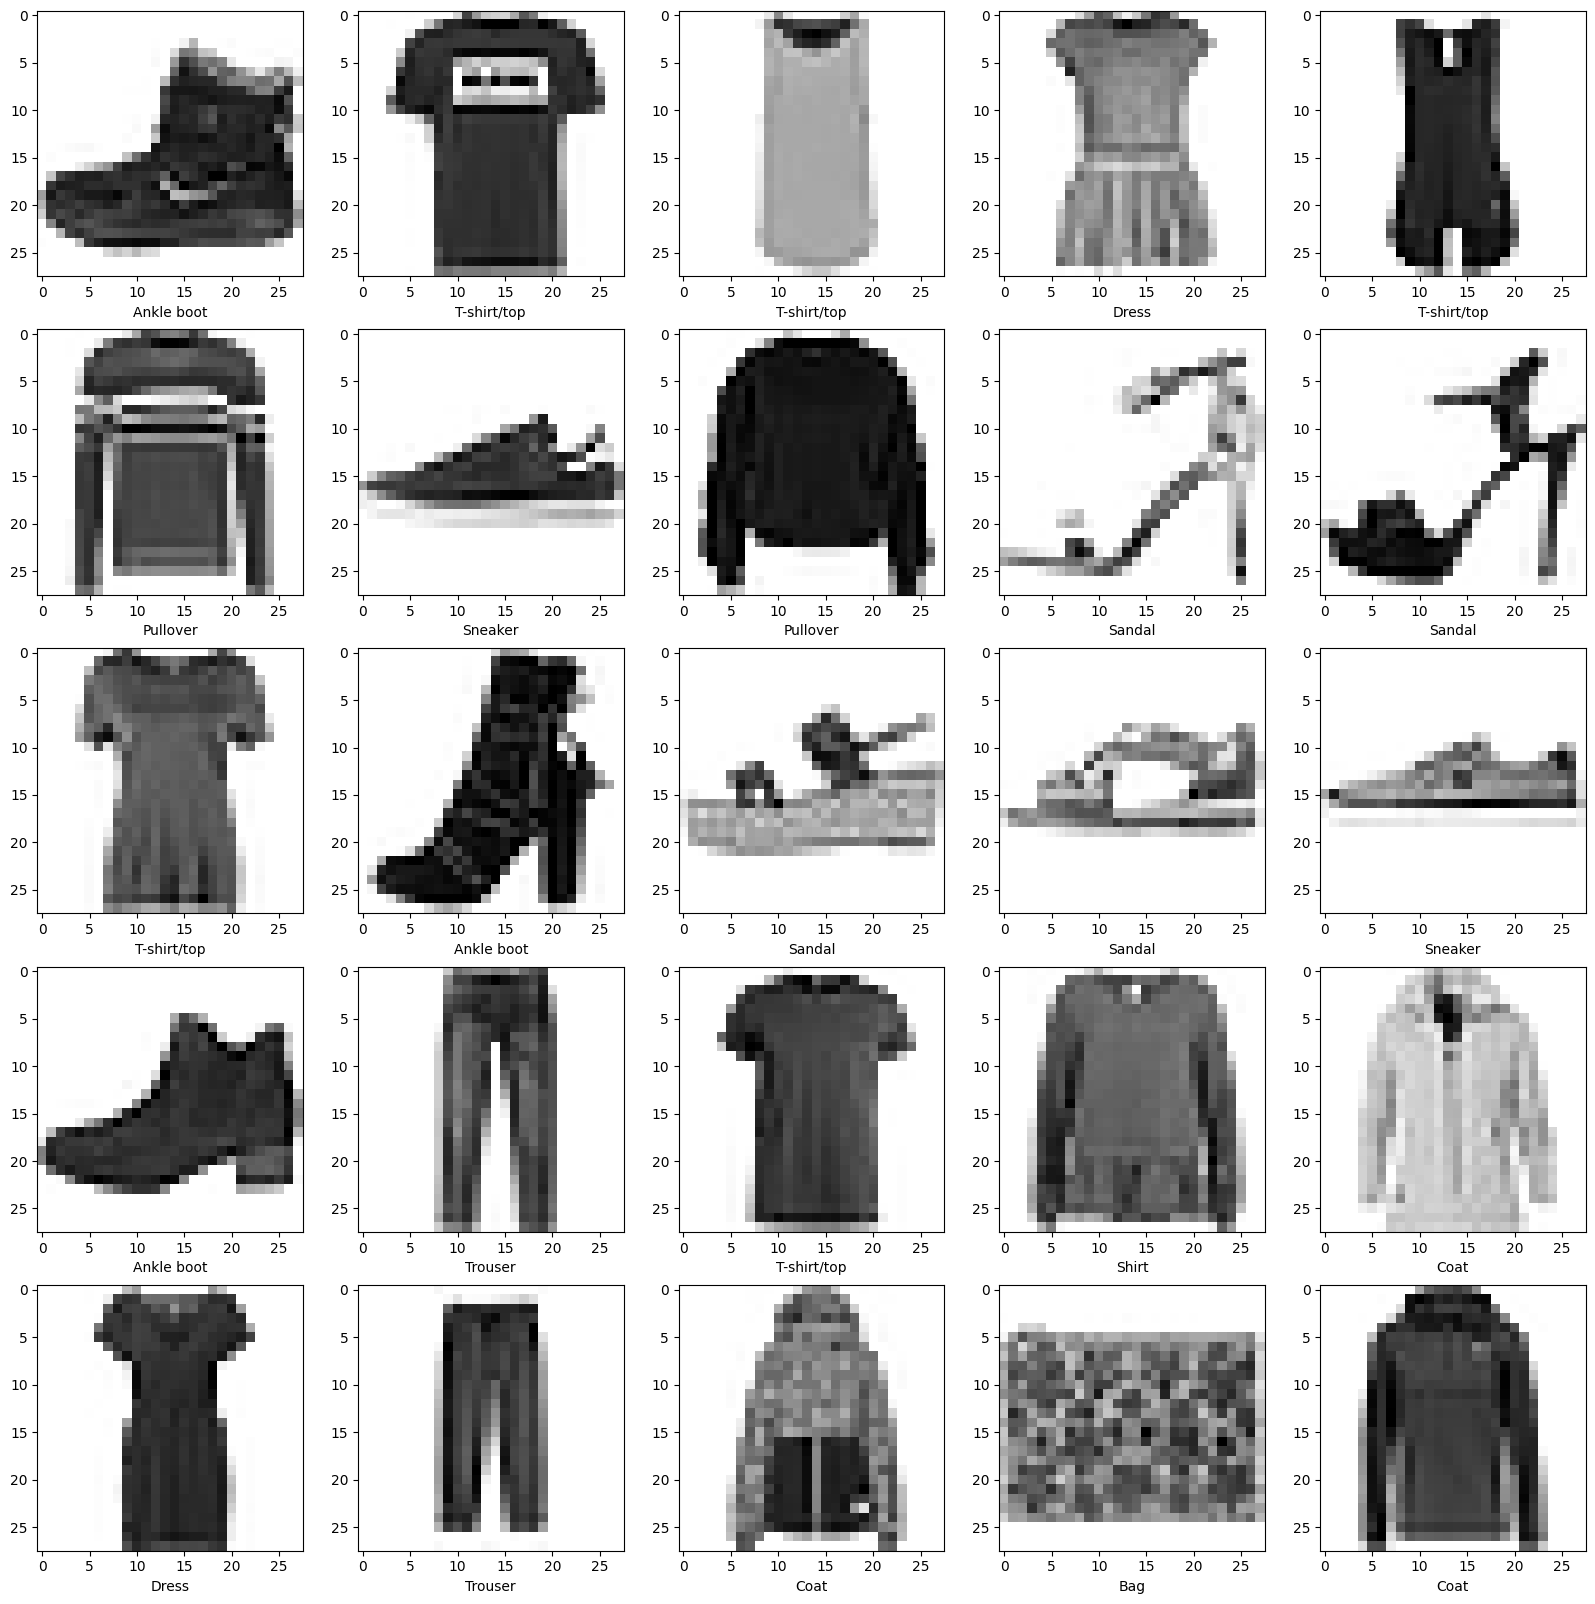

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images[i], cmap='binary')

  plt.xlabel(class_names[train_labels[i]])

### Making the Model

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ]
)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4988 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3760 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3364 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2493 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("The Test Accuracy is: ", test_acc)

313/313 - 1s - loss: 0.3629 - accuracy: 0.8742 - 592ms/epoch - 2ms/step
The Test Accuracy is:  0.8741999864578247


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Sentiment Analysis with RNNs

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset.element_spec

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.GC2I63_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.GC2I63_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.GC2I63_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"Lily Powers works at a speakeasy until her father dies.She then goes to New York to work at an office building.There she notices that if she wants to get any higher she has to give the men what they want.And what men want is her...well, you know.Alfred E.Green's Baby Face (1933) is a movie of high sexual content.For a movie of that era, anyway.This was one of the last Pre-Code films that were made.Barbara Stanwyck gives a very sexy performance as Lily.Other actors of this film include George Brent (Courtland Trenholm), Donald Cook (Ned Stevens), Alphonse Ethier (Adolf Cragg), Henry Kolker (J.P.Carter), Margaret Lindsay (Ann Carter) and Theresa Harris (Chico).The young John Wayne is seen as Jimmy McCoy Jr.This movie deals with a brave topic and it does it good.Baby Face is historically significant movie and therefore good to watch."
 b'**Warning! Spoilers Ahead!**<br /><br />This short is part one of two that expound upon the brief portion of "The Matrix" in which Morpheus ex

### Text Encoder

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE
)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1,   1, 488, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  2,   1,  66, ...,   0,   0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round Trip", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"Lily Powers works at a speakeasy until her father dies.She then goes to New York to work at an office building.There she notices that if she wants to get any higher she has to give the men what they want.And what men want is her...well, you know.Alfred E.Green's Baby Face (1933) is a movie of high sexual content.For a movie of that era, anyway.This was one of the last Pre-Code films that were made.Barbara Stanwyck gives a very sexy performance as Lily.Other actors of this film include George Brent (Courtland Trenholm), Donald Cook (Ned Stevens), Alphonse Ethier (Adolf Cragg), Henry Kolker (J.P.Carter), Margaret Lindsay (Ann Carter) and Theresa Harris (Chico).The young John Wayne is seen as Jimmy McCoy Jr.This movie deals with a brave topic and it does it good.Baby Face is historically significant movie and therefore good to watch."
Round Trip [UNK] [UNK] works at a [UNK] until her father [UNK] then goes to new york to work at an [UNK] [UNK] she [UNK] that if she wants to g

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
      input_dim=len(encoder.get_vocabulary()),
      output_dim=64,
      mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
]
)

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


### Checking out if masking working properly

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 4s 4s/step
[0.00686901]


In [ ]:
padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])


1/1 [==============================] - 1s 765ms/step
[0.00686901]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data = test_dataset, validation_steps= 30)

Epoch 1/10
391/391 [==============================] - 752s 2s/step - loss: 0.6336 - accuracy: 0.5692 - val_loss: 0.5567 - val_accuracy: 0.7021
Epoch 2/10
391/391 [==============================] - 696s 2s/step - loss: 0.4622 - accuracy: 0.7646 - val_loss: 0.4092 - val_accuracy: 0.8115
Epoch 3/10
391/391 [==============================] - 675s 2s/step - loss: 0.3772 - accuracy: 0.8292 - val_loss: 0.3741 - val_accuracy: 0.8240
Epoch 4/10
391/391 [==============================] - 670s 2s/step - loss: 0.3520 - accuracy: 0.8410 - val_loss: 0.3613 - val_accuracy: 0.8443
Epoch 5/10
391/391 [==============================] - 677s 2s/step - loss: 0.3382 - accuracy: 0.8479 - val_loss: 0.3508 - val_accuracy: 0.8438
Epoch 6/10
391/391 [==============================] - 672s 2s/step - loss: 0.3302 - accuracy: 0.8540 - val_loss: 0.3491 - val_accuracy: 0.8484
Epoch 7/10
391/391 [==============================] - 678s 2s/step - loss: 0.3260 - accuracy: 0.8573 - val_loss: 0.3545 - val_accuracy: 0.8568

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: ', test_loss, "Test Acc: ", test_acc)

NameError: name 'model' is not defined

RNN Text Generation

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [ ]:
text = open (path_to_file, 'rb').read().decode(encoding='utf-8')
print(f'length of text: {len(text)} characters')

length of text: 1115394 characters


In [ ]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [ ]:
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


### Gotta vectorize the text

In [ ]:
example_texts = ['abdefg', 'xyz']

chars= tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [ ]:
ids_from_chars= tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)





In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None
)

In [ ]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 43, 44, 45, 46], [63, 64, 65]]>

In [ ]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [ ]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abdefg', b'xyz'], dtype=object)

#### Cause we need a dataset

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [ ]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
  print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [ ]:
seq_length = 100

Batching up all this

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder= True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text

In [ ]:
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [ ]:
dataset = sequences.map(split_input_target)

for input_example, target_example in dataset.take(1):
  print("Input :", text_from_ids(input_example).numpy())
  print("Target :", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target : b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


### Create training batches

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = (
    dataset.shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

### Building the Model

In [ ]:
vocab_size = len(ids_from_chars.get_vocabulary())

embedding_dim = 256
rnn_units= 1024

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    vocab_size = vocab_size,
    embedding_dim = embedding_dim,
    rnn_units = rnn_units
)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  16896     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  67650     
                                                                 
Total params: 4022850 (15.35 MB)
Trainable params: 4022850 (15.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([52, 29, 44,  4, 37,  9, 47, 61,  2,  6, 11, 59, 26, 65, 52, 63, 60,
       48, 65, 57, 24, 52, 32, 44,  0, 18, 18, 45, 65, 21, 41, 38, 23, 42,
       11, 24, 45, 36, 54,  6, 16, 63, 20, 65, 36, 42, 30, 55,  6, 19, 17,
       45, 43, 44,  8,  6, 22, 18, 43, 64, 24, 26, 40, 58, 27, 19, 21, 46,
       24, 31, 41,  9, 64,  9, 53, 30,  9, 53, 11, 50, 55, 52, 61, 10, 21,
        9,  3, 25, 33, 15, 43, 13,  6, 10, 32, 45, 18, 30, 61,  0])

Trying to see the predicted text

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n",text_from_ids(sampled_indices).numpy())

Input:
 b'nt of death.\n\nESCALUS:\nGood even, good father.\n\nDUKE VINCENTIO:\nBliss and goodness on you!\n\nESCALUS:'

Next Char Predictions:
 b"mPe$X.hv ':tMzmxuizrKmSe[UNK]EEfzHbYJc:KfWo'CxGzWcQp'FDfde-'IEdyKMasNFHgKRb.y.nQ.n:kpmv3H.!LTBd?'3SfEQv[UNK]"


Adding an optimiser and loss function

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: #(batch_size, sequence_length, vocab_size)", example_batch_predictions.shape)
print("Mean Loss: ", example_batch_mean_loss)

Prediction shape: #(batch_size, sequence_length, vocab_size) (64, 100, 66)
Mean Loss:  tf.Tensor(4.189424, shape=(), dtype=float32)


In [ ]:
tf.exp(example_batch_mean_loss).numpy()

65.98477

In [ ]:
model.compile(optimizer='adam', loss=loss)

Make a way to save checkpoints during training

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_prefix,
    save_weights_only = True
)

In [ ]:
EPOCHS= 10

In [ ]:
history = model.fit(
    dataset, epochs=EPOCHS,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
 28/172 [===>..........................] - ETA: 13:33 - loss: 3.8911

KeyboardInterrupt: 

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model= model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars
    skip_ids